In [206]:
# Matthew McCall ASTR 104 PS4
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Problem 1

## 1.1

In [207]:
H_e = 13.6 # in eV
kB_ev = 8.617*(10**(-5)) # in eV/K
T_naive = H_e / kB_ev
print(f"The naive temperature for ionization is {T_naive:.1f} K. "
      "Given our assumptions, we would NOT expect the solar atmosphere to be ionized."
     )


The naive temperature for ionization is 157827.6 K. Given our assumptions, we would NOT expect the solar atmosphere to be ionized.


## 1.2

The ratio of hydrogen atoms in the n=2 state versus the n=1 state is 5.478466683421467e-09.There are very few atoms in the n=2 excited state required for Balmer absorption, so Balmer lines are weak.


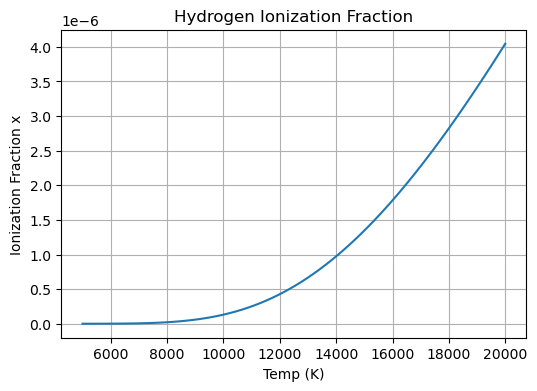

The ionization fraction is near 0 at 5800K, and reaches unity around 14000K, much lower than our previously calculated naive temperature


In [208]:
# constants
T = 5800 # in K
delta_E = 10.2 # in eV, difference between n = 1 and n = 2 level
# ground state and first excited state degeneracies
g1 = 2
g2 = 8
H_e = 13.6 # in eV
kB_ev = 8.617*(10**(-5)) # in eV/K
ratioN2N1 = (g2/g1)*math.exp(-delta_E / (kB_ev*T))
print(f"The ratio of hydrogen atoms in the n=2 state versus the n=1 state is {ratioN2N1}." 
"There are very few atoms in the n=2 excited state required for Balmer absorption, "
"so Balmer lines are weak."
     )
kB_erg = 1.38e-16 # in erg/K
h = 6.626e-27 # in erg*s
m_e = 9.11e-28 # in g
chi = 13.6 * 1.602e-12 # erg

# densities
rho = 1e-9
mu_H = 1.67e-24
n_H = rho / mu_H

T_arr = np.linspace(5000,20000,100)
x_arr = []

for T in T_arr:
    n_e = n_H # maximum electrons at full ionization
    coeff = (2 * np.pi * m_e * kB_erg * T / h**2)**1.5 * 2 / n_H
    exponent = np.exp(chi / (kB_erg * T))
    x = coeff * exponent
    x = (-1 + np.sqrt(1 + 4*x)) / (2*x) if x>0 else 0
    x_arr.append(x)

# plotting
plt.figure(figsize = (6,4))
plt.plot(T_arr, x_arr)
plt.xlabel("Temp (K)")
plt.ylabel("Ionization Fraction x")
plt.title("Hydrogen Ionization Fraction")
plt.grid(True)
plt.show()

print(f"The ionization fraction is near 0 at 5800K, and reaches unity around 14000K, much lower than our previously calculated naive temperature")

## 1.3

In [209]:
# Central Sun Density Calculation
T_c = 1e7 # in K
rho_c = 160 # in g/cm^3
n_Hc = rho_c / mu_H

coeff_c = (2 * np.pi * m_e * kB_erg * T_c / h**2)**1.5 * 2 / n_Hc
exponent_c = np.exp(-chi / (kB_erg * T_c))
x_c = coeff_c * exponent_c
x_c_final = (-1 + np.sqrt(1 + 4*x_c)) / (2*x_c) if x_c > 0 else 0

print(f"The ionization fraction in the suns core is {x_c_final:.2f}")
print('Assuming that all of the hydrogen (or nearly all) is ionized, our calculations are significantly off.'
      ' '
      ' This likely stems from when we compute n_max, and the neutral component of our fraction nears zero.'
      ' This is unrealistic, and shows that the Saha equation is likely invalid in the suns core, at least under our assumptions'
     )

The ionization fraction in the suns core is 0.54
Assuming that all of the hydrogen (or nearly all) is ionized, our calculations are significantly off.  This likely stems from when we compute n_max, and the neutral component of our fraction nears zero. This is unrealistic, and shows that the Saha equation is likely invalid in the suns core, at least under our assumptions


## 1.4

In [210]:
# 1.4a: Hydrogen in the Excited State
E_2 = 10.2 # boltzmann factor for n=2, in eV
frac_excited = np.exp(-E_2 / (kB_ev * 5800))
print(f"Part A: The fraction of hydrogen in the n=2 / n=1 state at 5800K is {frac_excited:.2e}")

# 1.4b: Ionization Fraction of Calcium
chi_Ca = 6.11 * 1.602e-12
Z_I = 1.32
Z_II = 2.3

coeff_Ca = (2 * np.pi * m_e * kB_erg * 5800 / h**2)**1.5 * (Z_II/Z_I) / n_H
exponent_Ca = np.exp(-chi_Ca / (kB_erg * 5800))
x_Ca = coeff_Ca * exponent_Ca
x_Ca_final = (-1 + np.sqrt(1 + 4*x_Ca)) / (2*x_Ca) if x_Ca > 0 else 0
print(f"Part B: The calcium ionization fraction is {x_Ca_final:.2f}")

# 1.4c: CaII ground state 
E21 = 3.12 # in eV
g_ratio = 2
frac_ground = 1 / (1 + g_ratio * np.exp(-E21 / (kB_erg * 5800)))
print(f"Part C: The Ca II ground state fraction is {frac_ground:.2f}")

# 1.4d: Number Ratio of Hydrogen Atoms for Balmer Lines vs Ca for Fraunhaufer Lines
H_Ca_ratio = 5e5
H_excited = H_Ca_ratio * frac_excited
Ca_Fraunhaufer = x_Ca_final * frac_ground
ratio = H_excited / Ca_Fraunhaufer
print(f"Part D: The ratio of H that can produce Balmer lines vs Ca that can produce Fraunhaufer lines is {ratio:.5f}")
print("Despite H being much more abundant than Ca, the amount in the correct excited state to \nproduce Balmer lines is much smaller than Ca producing Fraunhaufer lines.")

Part A: The fraction of hydrogen in the n=2 / n=1 state at 5800K is 1.37e-09
Part B: The calcium ionization fraction is 0.23
Part C: The Ca II ground state fraction is 1.00
Part D: The ratio of H that can produce Balmer lines vs Ca that can produce Fraunhaufer lines is 0.00303
Despite H being much more abundant than Ca, the amount in the correct excited state to 
produce Balmer lines is much smaller than Ca producing Fraunhaufer lines.


# Problem 2

## 2.1 and 2.2

In [220]:
# constants again
kB_erg = 1.38e-16 # in erg/K
kB_ev = 8.617e-5 # boltzmann constant in ev/K
h = 6.626e-27 # planck's constant in erg/s
c = 3e10 # speed of light in cm/s
me = 9.11e-28 # electron mass in g
mh = 1.67e-24 # hydrogen mass in g
ev_to_erg = 1.6022e-12 # eV to erg conversion

Eb_H2 = 4.52 * ev_to_erg # H2 bond energy in eV
Ei_H = 13.6 * ev_to_erg # ionization energy, also in eV

# temp/pressure grids
logT = np.linspace(2,5,300) # logT from 100 to 100000K
logP = np.linspace(0,13,300) # LogP from 1 to 1e13 dyne/cm^2
T = 10**logT
P = 10**logP

TT, PP = np.meshgrid(T, P, indexing = 'ij')
'''
Used numpy meshgrid function to set up arrays of T, P, and then evaluate things like
the Saha ionization fraction, entropy, adiabatic temperature gradient, etc. Since looping
over T and P isnt really efficient for the code, and we're graded on efficiency/accuracy, this seemed
to be the optimal solution. Documentation on how I learned to use the function is linked below.
https://numpy.org/doc/2.3/reference/generated/numpy.meshgrid.html
'''
# now part 1 :D
def partition_HI(T):
    return 2 # approximation for atomic hydrogen (HI)
def partition_H2(T): # internal partition function for H2 molecule
    # electronic
    Zelec = 1 + np.exp(-Eb_H2 / (kB_erg * T)) # electronic partition function
    # vibrational
    theta_v = 6100 # in K
    Zvib = 1 / (1-np.exp(-theta_v / T)) # vibrational partition function
    # rotational
    theta_rot = 85.4 # rotational temp in K
    Zrot = np.zeros_like(T) 
    for j in range(101):
        E_j = j * (j+1) * theta_rot
        g_j = (2 * j + 1)
        if j%2 == 0:
            g_nuclear = 1 # parallel
        else: 
            g_nuclear = 3 # orthogonal
        Zrot += g_j * g_nuclear * np.exp(-E_j / T) # rotational partition function
    return Zelec * Zvib * Zrot

def compute_xHI(T, P):
    # thermal wavelengths
    lambda_HI = h / np.sqrt(2 * np.pi * mh * kB_erg * T)
    lambda_H2 = h / np.sqrt(2 * np.pi * 2*mh * kB_erg * T)
    Zint_HI = partition_HI(T)
    Zint_H2 = partition_H2(T)
    # equilibrium constant in pressure units, K_p = (2πmkT/h^2)^(3/2) * (Z_int,HI^2 / Z_int,H2) * kT * exp(-Eb/kT)
    # from K_p = (kT)^2 / lambda_HI^6 * lambda_H2^3 * (Z^2 / Z) * exp(-Eb/kT)
    
    K_p = (kB_erg * T / lambda_HI**3)**2 / (kB_erg * T / lambda_H2**3) * (Zint_HI**2 / Zint_H2) * np.exp(-Eb_H2 / (kB_erg * T)) * kB_erg * T
    
    # dimensionless form: x^2 / (1-x) = K_p / P
    K_dimless = K_p / P
    K_dimless = np.clip(K_dimless, 1e-300, 1e10)
    
    # solve quadratic
    x_HI = (-K_dimless + np.sqrt(K_dimless**2 + 4*K_dimless)) / 2
    return np.clip(x_HI, 0, 1)


## 2.3

In [221]:
# saha equation
def compute_xHII(T, P, xHI_unused):
    """
    Return x_HII = n_HII / n_HI from the Saha equation
    for pure H (approximation) assuming ideal gas.
    """
    # (n_H = n_HI + n_HII)
    n_H = P / (kB_erg * T)

    # saha prefactor
    saha_pref = 2.0 * (2.0 * np.pi * me * kB_erg * T / h**2)**1.5 \
                * np.exp(-Ei_H / (kB_erg * T))

    # x_e = n_e / n_H for x_e^2 / (1 - x_e) = saha_pref / n_H
    Phi = saha_pref / n_H
    x_e = (-Phi + np.sqrt(Phi**2 + 4.0 * Phi)) / 2.0
    x_e = np.clip(x_e, 1e-12, 1.0 - 1e-12)

    # x_HII ≡ n_HII / n_HI = x_e / (1 - x_e)
    x_HII_ratio = x_e / (1.0 - x_e)
    return x_HII_ratio


x_HI_grid = compute_xHI(TT, PP)
x_HII_grid = compute_xHII(TT, PP, x_HI_grid)

total = x_HI_grid + x_HII_grid
x_H2_grid = 1 - total
x_H2_grid = np.clip(x_H2_grid, 0, 1)

## 2.4 and 2.5

In [222]:
# computing specific entropy using: S/m = (k_B/m) * [ln(Z_int * z_trans) + 5/2]
# where z_trans = (kBT/P) / lambda^3 and lambda = h/sqrt(2πmkT) is thermal wavelength

# H2 molecule
lambda_H2 = h / np.sqrt(2 * np.pi * 2*mh * kB_erg * TT)
z_trans_H2 = (kB_erg * TT / PP) / lambda_H2**3
Z_H2 = partition_H2(TT)
# nonzero product
product_H2 = z_trans_H2 * Z_H2
product_H2 = np.where(product_H2 < 1.0, 1.0, product_H2)  # Can't have Z < 1 physically
S_H2 = (kB_erg / (2*mh)) * (np.log(product_H2) + 5/2)

# HI atom
lambda_HI = h / np.sqrt(2 * np.pi * mh * kB_erg * TT)
z_trans_HI = (kB_erg * TT / PP) / lambda_HI**3
Z_HI = partition_HI(TT)
product_HI = z_trans_HI * Z_HI
product_HI = np.where(product_HI < 1.0, 1.0, product_HI)
S_HI = (kB_erg / mh) * (np.log(product_HI) + 5/2)

# HII ion
lambda_HII = h / np.sqrt(2 * np.pi * mh * kB_erg * TT)
z_trans_HII = (kB_erg * TT / PP) / lambda_HII**3
product_HII = z_trans_HII * 1.0
product_HII = np.where(product_HII < 1.0, 1.0, product_HII)
S_HII = (kB_erg / mh) * (np.log(product_HII) + 5/2)

# electron
lambda_e = h / np.sqrt(2 * np.pi * me * kB_erg * TT)
z_trans_e = (kB_erg * TT / PP) / lambda_e**3
product_e = z_trans_e * 2.0
product_e = np.where(product_e < 1.0, 1.0, product_e)
S_e = (kB_erg / me) * (np.log(product_e) + 5/2)

# calculate mixture
m_H2 = 2 * mh
m_HI = mh
m_HII = mh
total_mass = x_H2_grid * m_H2 + x_HI_grid * m_HI + x_HII_grid * m_HII
f_H2 = (x_H2_grid * m_H2) / total_mass
f_HI = (x_HI_grid * m_HI) / total_mass
f_HII = (x_HII_grid * m_HII) / total_mass

S_mixture = f_H2 * S_H2 + f_HI * S_HI + f_HII * (S_HII + S_e * (me/mh))

In [223]:
def compute_adiabatic_gradient(logT, logP, S_mixture):
    S_grid_safe = np.clip(S_mixture, 1e-100, None)
    dS_dlogT = np.gradient(np.log(S_grid_safe), logT, axis=0)
    dS_dlogP = np.gradient(np.log(S_grid_safe), logP, axis=1)
    
    # Compute gradient
    adiabatic_gradient = -dS_dlogP / dS_dlogT
    
    # Set unreasonable values to NaN
    adiabatic_gradient = np.where(np.abs(dS_dlogT) < 1e-5, np.nan, adiabatic_gradient)
    adiabatic_gradient = np.where(adiabatic_gradient < -1, np.nan, adiabatic_gradient)
    adiabatic_gradient = np.where(adiabatic_gradient > 2, np.nan, adiabatic_gradient)
    
    return adiabatic_gradient

adiabatic_gradient = compute_adiabatic_gradient(logT, logP, S_mixture)

/tmp/ipykernel_412/1058817093.py:7: RuntimeWarning: divide by zero encountered in divide
  adiabatic_gradient = -dS_dlogP / dS_dlogT
/tmp/ipykernel_412/1058817093.py:7: RuntimeWarning: invalid value encountered in divide
  adiabatic_gradient = -dS_dlogP / dS_dlogT


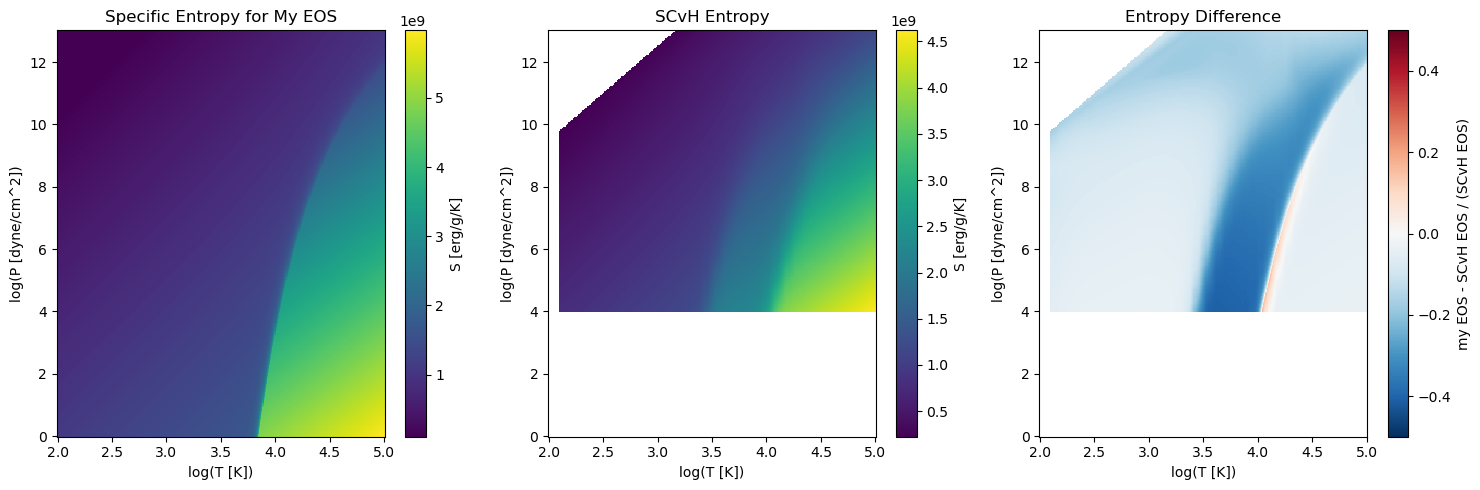

In [224]:
# plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# first column, my EOS
im1 = axes[0].pcolormesh(logT, logP, S_mixture.T, shading='auto', cmap='viridis')
axes[0].set_xlabel('log(T [K])')
axes[0].set_ylabel('log(P [dyne/cm^2])')
axes[0].set_title('Specific Entropy for My EOS')
cbar1 = plt.colorbar(im1, ax=axes[0])
cbar1.set_label('S [erg/g/K]')

# load SCvH data before we plot
logT_scvh = []
logP_scvh = []
S_scvh = []
grad_ad_scvh = []
"""
heres where I learned how to use readlines to interpret the data in the SCvH EOS, linked below :D
https://www.w3schools.com/python/ref_file_readlines.asp
"""
with open('h_tab_i.dat', 'r') as f:
    lines = f.readlines()
    i = 0
    while i < len(lines):
        parts = lines[i].split()
        if len(parts) == 2:  # isotherm header line
            log_T = float(parts[0])
            n_points = int(parts[1])
            for j in range(n_points):
                i += 1
                data = lines[i].split()
                logT_scvh.append(log_T)
                logP_scvh.append(float(data[0]))
                S_scvh.append(10**float(data[4]))  
                grad_ad_scvh.append(float(data[10]))
        i += 1

#convert all to arrays
logT_scvh = np.array(logT_scvh)
logP_scvh = np.array(logP_scvh)
S_scvh = np.array(S_scvh)
grad_ad_scvh = np.array(grad_ad_scvh)

# interpolating
"""
documentation on np.column_stack is linked below :)
https://numpy.org/devdocs/reference/generated/numpy.column_stack.html
"""
points = np.column_stack([logT_scvh, logP_scvh])
S_scvh_interp = griddata(points, S_scvh, (logT[None, :], logP[:, None]), method='linear').T
grad_scvh_interp = griddata(points, grad_ad_scvh, (logT[None, :], logP[:, None]), method='linear').T

# fractional differences
frac_S = (S_mixture - S_scvh_interp) / S_scvh_interp
frac_grad = (adiabatic_gradient - grad_scvh_interp) / grad_scvh_interp

# column 2, SCvH EOS
axes[1].pcolormesh(logT, logP, S_scvh_interp.T, shading='auto', cmap='viridis')
axes[1].set_xlabel('log(T [K])')
axes[1].set_ylabel('log(P [dyne/cm^2])')
axes[1].set_title('SCvH Entropy')
plt.colorbar(axes[1].collections[0], ax=axes[1], label='S [erg/g/K]')

# column 3, last column, the difference :D
axes[2].pcolormesh(logT, logP, frac_S.T, shading='auto', cmap='RdBu_r', vmin=-0.5, vmax=0.5)
axes[2].set_xlabel('log(T [K])')
axes[2].set_ylabel('log(P [dyne/cm^2])')
axes[2].set_title('Entropy Difference')
plt.colorbar(axes[2].collections[0], ax=axes[2], label='my EOS - SCvH EOS / (SCvH EOS)')

plt.tight_layout()
plt.show()

In [225]:
print('These graphs seem to make sense. My EOS predicts slightly lower entropy than the SCvH EOS in most regions.\n' 
'At medium pressures and temperatures, my EOS underestimates entropy more significantly. The SCvH EOS only covers\n'
'a partial region that mine does, but the behavior is generally the same. I would attribute difference to simplifications\n'
'I made in my EOS, such as simplified partition functions.'
)

These graphs seem to make sense. My EOS predicts slightly lower entropy than the SCvH EOS in most regions.
At medium pressures and temperatures, my EOS underestimates entropy more significantly. The SCvH EOS only covers
a partial region that mine does, but the behavior is generally the same. I would attribute difference to simplifications
I made in my EOS, such as simplified partition functions.


## 2.7

In [226]:
#computing fractional differences
frac_S = (S_mixture - S_scvh_interp) / S_scvh_interp
frac_grad = (adiabatic_gradient - grad_scvh_interp) / grad_scvh_interp

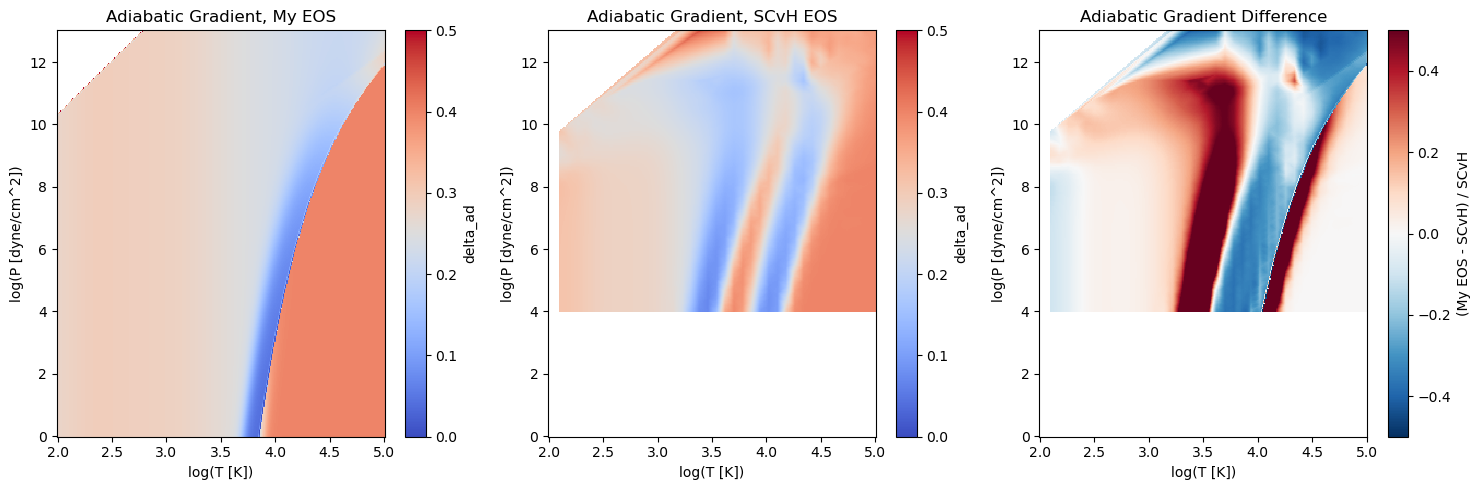

In [227]:
# part 7: adiabatic gradient comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# column 1, my adiabatic gradient
im1 = axes[0].pcolormesh(logT, logP, adiabatic_gradient.T, shading='auto', cmap='coolwarm', vmin=0, vmax=0.5)
axes[0].set_xlabel('log(T [K])')
axes[0].set_ylabel('log(P [dyne/cm^2])')
axes[0].set_title('Adiabatic Gradient, My EOS')
cbar1 = plt.colorbar(im1, ax=axes[0])
cbar1.set_label('delta_ad')

# column 2, SCvH adiabatic gradient
im2 = axes[1].pcolormesh(logT, logP, grad_scvh_interp.T, shading='auto', cmap='coolwarm', vmin=0, vmax=0.5)
axes[1].set_xlabel('log(T [K])')
axes[1].set_ylabel('log(P [dyne/cm^2])')
axes[1].set_title('Adiabatic Gradient, SCvH EOS')
cbar2 = plt.colorbar(im2, ax=axes[1])
cbar2.set_label('delta_ad')

# column 3, Fractional difference
im3 = axes[2].pcolormesh(logT, logP, frac_grad.T, shading='auto', cmap='RdBu_r', vmin=-0.5, vmax=0.5)
axes[2].set_xlabel('log(T [K])')
axes[2].set_ylabel('log(P [dyne/cm^2])')
axes[2].set_title('Adiabatic Gradient Difference')
cbar3 = plt.colorbar(im3, ax=axes[2])
cbar3.set_label('(My EOS - SCvH) / SCvH')

plt.tight_layout()
plt.show()

In [219]:
print('For this plot, there are more noticeable differences between my gradient and the SCvH gradient.\n'
      'My plot shows much less variation than the SCvH EOS, likely indicating my EOS (like I pointed out before)\n'
      'has significant simplifications compared to the SCvH EOS.' 
     )

For this plot, there are more noticeable differences between my gradient and the SCvH gradient.
My plot shows much less variation than the SCvH EOS, likely indicating my EOS (like I pointed out before)
has significant simplifications compared to the SCvH EOS.
